Daniela Porras - Is 362
# Auto MPG Dataset - Exploratory Data Analysis

In this notebook, we will perform exploratory data analysis (EDA) on the Auto MPG dataset. This dataset contains information on fuel efficiency (miles per gallon) for various car models from the late 1970s and early 1980s. 

We will load the dataset, perform basic tidying and transformations using pandas, and create visualizations using matplotlib and seaborn to uncover patterns and relationships within the data. 

The dataset includes features like cylinders, horsepower, weight, model year, and origin, which we will explore to identify insights into car performance and fuel efficiency trends.


In [2]:
# Step 1 - Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# This will make sure plots show inside the notebook
%matplotlib inline

In [4]:
# Step 2 - Load Dataset 

# Adjust the filename depending on what you moved into JupyterLab
df = pd.read_csv("auto-mpg.data-original", delim_whitespace=True, header=None)

# Assign column names based on the auto-mpg.names file
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model_year', 'origin', 'car_name']

# Display first few rows
df.head()


/var/folders/f_/8c7xpn692536sw819yzn7q_h0000gn/T/ipykernel_41348/1522276232.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("auto-mpg.data-original", delim_whitespace=True, header=None)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


## Dataset Preview Explanation

The table above shows the first four rows of the Auto MPG dataset. Each row represents a different car model, along with key attributes that describe its characteristics and performance. The columns include:

- **mpg**: Miles per gallon (fuel efficiency).
- **cylinders**: The number of engine cylinders.
- **displacement**: Engine displacement (in cubic inches).
- **horsepower**: The car’s horsepower.
- **weight**: Vehicle weight (in pounds).
- **acceleration**: Acceleration (time to go from 0 to 60 mph).
- **model_year**: The model year of the car (e.g., 70 = 1970).
- **origin**: The origin of the car (1 = USA, 2 = Europe, 3 = Japan).
- **car_name**: The name of the car model.

This dataset provides information on car models from the late 1970s to early 1980s. We will use this data for exploratory data analysis to identify trends and patterns related to fuel efficiency and car specifications.


In [5]:
# Step 3 - Clean Data - We'll clean the dataset by handling missing values (such as '?' in the horsepower column) and converting data types where needed. 

# Replace '?' with NaN in horsepower
df['horsepower'] = df['horsepower'].replace('?', pd.NA)

# Convert horsepower to numeric (it was object due to '?')
df['horsepower'] = pd.to_numeric(df['horsepower'])

# Check for missing values
df.isnull().sum()

mpg             8
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

# Data Cleaning & Tidying

The dataset contains some missing values, especially in the horsepower column where '?' was used as a placeholder for missing data. In this step, we:

1. Replaced all '?' values in the horsepower column with NaN so they can be properly detected as missing.
2. Converted the horsepower column from an object (string) type to a numeric type.
3. Verified if there are any remaining missing values across the dataset.

Handling missing data is crucial to ensure accurate analysis and to avoid errors during visualization or model building.


In [6]:
# Step 4 - Handle Missing Data - Since we want to proceed with exploratory analysis without gaps, I'll now remove rows with missing values. 

# Drop rows with missing values
df_clean = df.dropna()

# Confirm missing values are gone
df_clean.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

## Handling Missing Data

To ensure that the dataset is clean and ready for analysis, we dropped all rows containing missing values. This allows us to avoid issues during analysis and visualization. After dropping these rows, we verified that there are no remaining missing values.


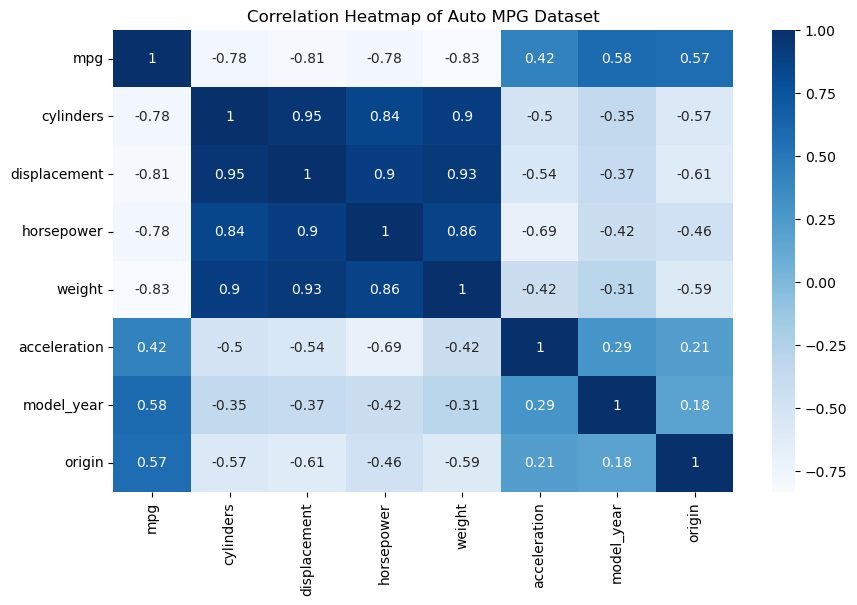

In [8]:
# Step 5.1 - Exploratory Data Analysis (EDA) - checking how strongly the numeric variables relate to each other using a heatmap. 

import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df_clean.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Correlation Heatmap of Auto MPG Dataset")
plt.show()

## Correlation Heatmap

The correlation heatmap provides a visual overview of how the numeric variables are related to each other. Darker shades indicate stronger correlations. For example, we can check if there is a relationship between mpg (fuel efficiency) and features like weight or horsepower.

The correlation heatmap reveals how numerical variables in the dataset relate to one another. For example:

- mpg (miles per gallon) is negatively correlated with weight, displacement, and horsepower. This suggests that as these values increase, fuel efficiency tends to decrease.

- mpg has a positive correlation with model year, meaning newer models in the dataset tend to have higher fuel efficiency.

- There's a strong positive correlation between weight, displacement, and horsepower, which makes sense because heavier cars often have larger engines and more horsepower.


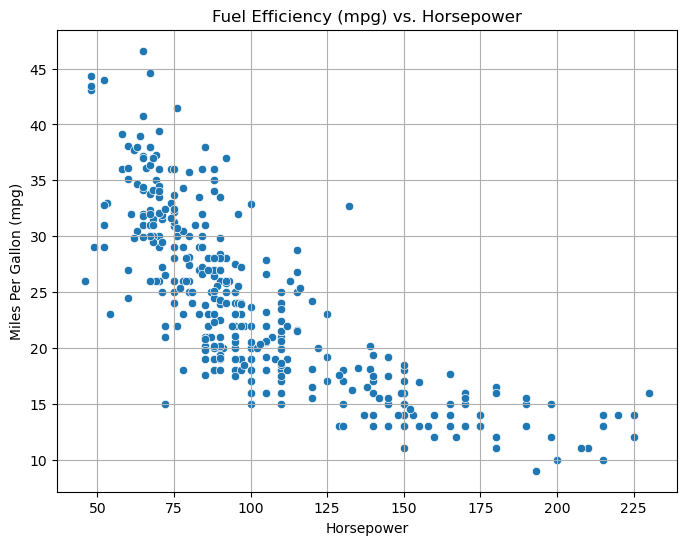

In [10]:
# Step 5.2 - Scatter Plot: Horsepower vs. MPG - In this step, we'll visualize the relationship between horsepower and fuel efficiency(mgp).

# Scatter Plot: mpg vs. horsepower
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='horsepower', y='mpg') 
plt.title("Fuel Efficiency (mpg) vs. Horsepower")
plt.xlabel("Horsepower")
plt.ylabel("Miles Per Gallon (mpg)")
plt.grid(True)
plt.show()

## Scatter Plot Analysis: Horsepower vs. Fuel Efficiency (MPG)
In this visualization, we plotted a scatter plot to examine the relationship between a car’s horsepower and its fuel efficiency (measured in miles per gallon). From the scatter plot, there appears to be a strong negative correlation: as horsepower increases, fuel efficiency tends to decrease.

This makes sense, as vehicles with more powerful engines typically consume more fuel. The pattern helps us identify that lighter, less powerful cars generally achieve better mileage compared to heavier, high-horsepower models.

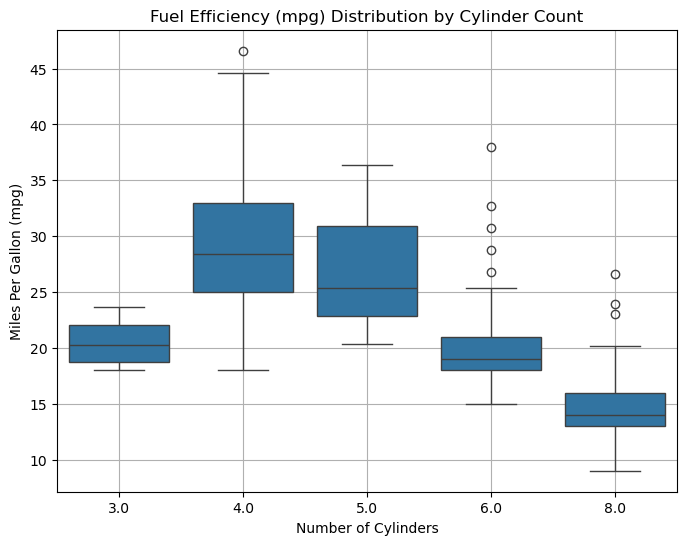

In [11]:
# Step 5.3 - Boxplot: MPG vs Cylinders - I'll now create a boxplot to compare fuel efficiency (mpg) across different cylinder counts. This will help understand how cars with more or fewer cylinders tend to perform in terms of fuel economy.

plt.figure(figsize=(8,6))
sns.boxplot(data=df_clean, x='cylinders', y='mpg')
plt.title("Fuel Efficiency (mpg) Distribution by Cylinder Count")
plt.xlabel("Number of Cylinders")
plt.ylabel("Miles Per Gallon (mpg)")
plt.grid(True)
plt.show()

## Boxplot: MPG vs. Cylinders

This boxplot shows the distribution of fuel efficiency (mpg) across different cylinder counts.

- Vehicles with **4 cylinders** tend to have higher fuel efficiency, with many mpg values concentrated above 25 mpg.
- **6-cylinder** and **8-cylinder** cars generally have lower mpg, with the 8-cylinder category showing the lowest median fuel efficiency, mostly below 20 mpg.
- The plot also highlights variability: cars with fewer cylinders (e.g., 4) exhibit a wider spread, suggesting a broader range of fuel efficiency levels, while 8-cylinder cars have more consistent but lower mpg.

In summary, this plot illustrates a clear negative relationship between cylinder count and fuel efficiency—fewer cylinders tend to correlate with better mpg performance.


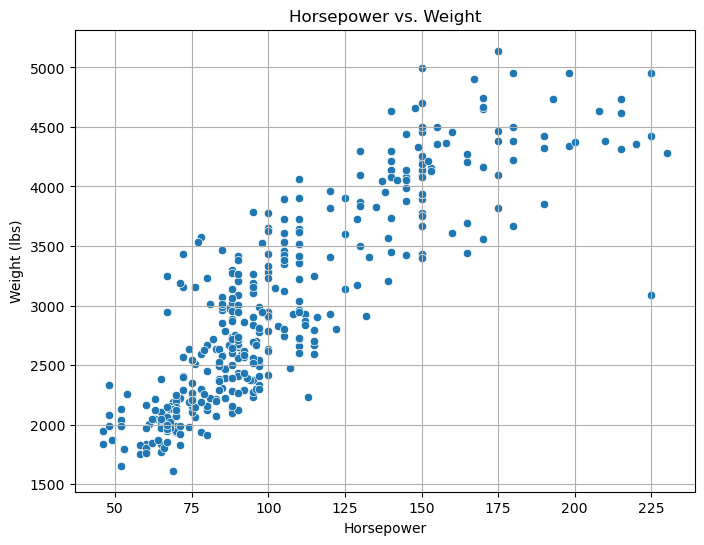

In [12]:
# Step 6: Scatterplot: Horsepower vs Weight

# Scatter Plot: horsepower vs weight
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_clean, x='horsepower', y='weight')
plt.title("Horsepower vs. Weight")
plt.xlabel("Horsepower")
plt.ylabel("Weight (lbs)")
plt.grid(True)
plt.show()

## Scatter Plot: horsepower vs weight

This scatterplot shows the relationship between horsepower and vehicle weight. As expected, there is a positive correlation, where heavier vehicles tend to have higher horsepower. This pattern aligns with automotive design trends, where larger and heavier cars generally require more powerful engines. The plot also helps identify any outliers, such as vehicles with unusually high horsepower for their weight.

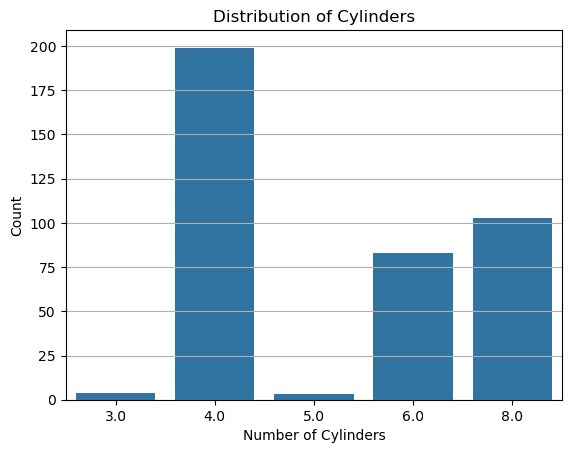

In [13]:
# Step 7 : Bar Chart for Cylinders Distribution

# Create a bar chart for the distribution of cylinders
sns.countplot(data=df_clean, x='cylinders')
plt.title('Distribution of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()

## Step 7 - Cylinders Distribution Bar Chart

This bar chart shows the count of cars grouped by the number of cylinders. From the visualization, we can observe how common each cylinder configuration is within the dataset. For example, 4-cylinder cars appear to be the most common, followed by 8-cylinder and 6-cylinder cars.


### Summary & Conclusion

In this notebook, I performed exploratory data analysis (EDA) on the Auto MPG dataset to uncover insights related to car characteristics and fuel efficiency.

**Key findings:**

1. The **correlation heatmap** revealed that:
   - Fuel efficiency (mpg) is negatively correlated with features like **horsepower**, **weight**, **cylinders**, and **displacement**.
   - There is a strong positive correlation between **horsepower** and **weight**.

2. The **scatter plot of horsepower vs. mpg** showed an inverse relationship, meaning cars with higher horsepower generally have lower fuel efficiency.

3. The **boxplot of mpg vs. cylinders** illustrated that cars with fewer cylinders (3 or 4) tend to have better fuel efficiency, while cars with 6 or 8 cylinders showed lower mpg values.

4. The **scatter plot of horsepower vs. weight** confirmed that heavier cars tend to have more powerful engines (higher horsepower).

5. The **bar chart for cylinders** distribution showed that cars with 4 cylinders are the most common in this dataset, indicating that smaller engines dominate the dataset, likely contributing to better average mpg.

**Conclusion:**
The analysis highlights the key trade-offs between vehicle power and fuel efficiency. Lighter vehicles with fewer cylinders and less horsepower are generally more fuel-efficient. These insights can help manufacturers and consumers make data-driven decisions regarding car design and purchasing based on fuel economy and performance needs.
